In [16]:
import pandas as pd
#import pandas.io.data as web   # this wont work.. so need to install pandas_datareader 
import pandas_datareader as web # on the anaconda prompt do conda install pandas-datareader
import datetime

import pandas_datareader as pdr
from pandas_datareader._utils import RemoteDataError
from pandas_datareader import data as pdrr
#import fix_yahoo_finance as yf
import imp
#import MySQLdb as msql
import pymysql as pymysql
import pymysql.cursors

In [17]:
import random
import numpy
import matplotlib.pyplot as plt

import pandas as pd
#import pandas.io.data as web   # this wont work.. so need to install pandas_datareader 
import pandas_datareader as web # on the anaconda prompt do conda install pandas-datareader
import datetime

import random
import numpy
import matplotlib.pyplot as plt

## CURRENT LIST

## need to push emailID and Datetime (current) to database

In [18]:
#wallet_list is a 3-D array with the first dimension being the week. for loop for a week 1-7.. wallet_klist[week] will give whole
# array which has tickersymbol,sum etc..

def db_portfolio_wallet_update():
    #try with exceutemany
    con = pymysql.connect('localhost', 'root', 'Capstone', 'portfolio_management')
    
    query_porfolio_insert = "INSERT INTO portfolio(EmailID, Week, Ticker, Number_of_Stocks, Price, Total) values(%s, %s, %s, %s, %s, %s)"
    query_wallet_insert = "INSERT INTO wallet(EmailId, Worth, Date, Balance, Week) values(%s, %s, %s, %s, %s)"
    
    with con:
        cur = con.cursor()
        for week in range(1,max_weeks+1):
            worth = 0
            for row in range (10):
                time_now = datetime.datetime.now()
                args_porfolio = (email, week, wallet_list[week][row][0],wallet_list[week][row][2],wallet_list[week][row][1], wallet_list[week][row][1]*wallet_list[week][row][2] ) 
                cur.execute(query_porfolio_insert, args_porfolio)
                worth = worth + (wallet_list[week][row][1]*wallet_list[week][row][2])
            time_now = datetime.datetime.now()
            args_wallet = (email, worth, time_now, wallet_bal[week], week)
            cur.execute(query_wallet_insert, args_wallet)



In [19]:
def get_sorted25():
    # Make a database connection and get the list of sorted 25 stocks based on twitter sentiment
    #return (random.sample(master_list,10))
    con = pymysql.connect('localhost', 'root', 'Capstone', 'portfolio_management')
        
    with con:
        cur = con.cursor()
        cur.execute("select sd.tickersymbol, sd.stockprice, sd.Weeknumber from stockdata sd join weekly_sentiment_scores w on sd.tickersymbol = w.Ticker_Symbol and sd.weeknumber = w.Week_num order by sd.Weeknumber asc, w.Sentiment_score desc")

        #will get all the sorted 25 symbols  from the db table sorted25 from week 1 - 7
        rows = cur.fetchall()

        for row in rows:
            #master_list.append(row[0],row[1])
            current_dict[row[2]].update({row[0]:row[1]})
        
    #return(current_dict)

def get_sorted25_test():
    #this is the one that will get the list from the db. For testing i have used the random to generate it
    master_list = ['AAPL','MSFT','GOOGL','GOOG','FB','V','MA','CSCO','INTC','ORCL','NVDA','IBM','ADBE','CRM','ACN','QCOM','TXN','PYPL','AVGO','ADP','ATVI','INTU','MU','CTSH','HPQ']
    for week in range(1,max_weeks+1):
        random.shuffle(master_list)
        for el in master_list:
            #current_dict[week] = {el:90 for el in ran_list}
            current_dict[week].update({el:random.randint(70,100)})

    


## Most recent change here as of 11/10/2018, 4:10pm. Changed the index because emailID is added

In [20]:

def get_initial_inv_amt():
    # Make a database connection and get the entries from the wallet table. 0th week's worth = intial investment amount
    # db wallet [week, worth, balance]
    con = pymysql.connect('localhost', 'root', 'Capstone', 'portfolio_management')
    
    with con:
        cur = con.cursor()
        cur.execute("select a.EmailID, a.Week, a.Worth from wallet a where a.week=0")
        #cur.execute("query to return {emailId, week#, amount} {(0,1000000),(1,999999),(1,9999998).....} where week# = 0 has the initial investment amount")
        rows = cur.fetchall()

        for row in rows:
            mail[0] = row[0]
            if(row[1]==0):
                return(row[2])
    
    return(0)

def get_initial_inv_amt_test():
    return (100000)

In [21]:
def new_additions(set_a, set_b):
    #return (set_a.union(set_b)-set_a.intersection(set_b))
    return (set_b - set_a)

In [22]:
def new_list(set_a, set_b):
    #return (set_a - (set_a.union(set_b)-set_a.intersection(set_b)))
    return ((set_a -(set_a - set_b)).union(set_b - set_a))

In [23]:
def sell_list(set_a, set_b):
    return (set_a - set_b)

In [24]:
def create_porfolio(set_a,week,init_inv_amt):
 # get from dB (get from dB)  
    wallet = init_inv_amt
    min = wallet #Some huge number
    per_stock = wallet/10
    idx = 0
    lucky_idx = 0
    lucky = "na"
    for x in set_a:
        stock_price = current_dict[week].get(x)
        if (stock_price < min):
            min = stock_price
            lucky = x
            lucky_idx = idx
        num = int(per_stock/stock_price)
        wallet = wallet - num*stock_price
        #wallet_list[week][idx] = [x,stock_price,num,num*stock_price]  CHANGE
        wallet_list[week][idx][0] = x
        wallet_list[week][idx][1] = stock_price
        wallet_list[week][idx][2] = num
        wallet_list[week][idx][3] = num*stock_price
        idx = idx + 1
    if (wallet > 0 and lucky != "na"):
        #lucky_stock_price = current_dict[week].get(lucky)  CHANGE
        lucky_stock_price = wallet_list[week][lucky_idx][1]
        num = int(wallet/lucky_stock_price)
        wallet = wallet - num*lucky_stock_price
        wallet_list[week][lucky_idx][2] += num
        wallet_list[week][lucky_idx][3] += num*lucky_stock_price
    return(wallet)   

In [25]:
def find_stock(sym,week):
    for x in range(len(wallet_list[week])):
        if (wallet_list[week][x][0] == sym):
            return (x)
    return(-1)

In [26]:
def modify_porfolio(set_sell,new,set_a,week):
    wallet = wallet_bal[week-1]
    idx = 0
    lucky_idx = 0
    lucky = "na"

    for x in set_sell:
        for i in range(10):
            if (wallet_list[week-1][i][0] == x):
                wallet = wallet + wallet_list[week-1][i][2] * current_dict[week].get(x)
    min = wallet #Some huge number
    if (new == 0):
        new = 1
    per_stock = wallet/new
    
    
    for x in set_a:
        prev = find_stock(x,week-1)
        if (prev > -1):
            # this means this is already in portfolio 
            # check this again
            #wallet_list[week][idx] = wallet_list[week-1][prev]  CHANGE
            wallet_list[week][idx][0] = x
            wallet_list[week][idx][2] = wallet_list[week-1][prev][2]
            stock_price = current_dict[week].get(x)
            wallet_list[week][idx][1] = stock_price
            wallet_list[week][idx][3] = stock_price * wallet_list[week][idx][2]
        else:
            stock_price = current_dict[week].get(x)
            num = int(per_stock/stock_price)
            wallet = wallet - num*stock_price
            #wallet_list[week][idx] =[x,stock_price,num,num*stock_price] CHANGE
            wallet_list[week][idx][0] = x
            wallet_list[week][idx][1] = stock_price
            wallet_list[week][idx][2] = num
            wallet_list[week][idx][3] = num*stock_price
            if (stock_price < min):
                min = stock_price
                lucky = x
                lucky_idx = idx
        idx = idx +1
    if (wallet > 0 and lucky != "na"):
        #CHANGE
        # lucky_stock_price = current_dict[week].get(lucky) CHANGE
        lucky_stock_price = wallet_list[week][lucky_idx][1]
        num = int(wallet/lucky_stock_price)
        wallet = wallet - num*lucky_stock_price
        wallet_list[week][lucky_idx][2] += num
        wallet_list[week][lucky_idx][3] += num*lucky_stock_price
        
    return (wallet)

In [27]:
def pretty_print(listOfLists):
    worth = 0
    print ("%11s%11s%11s%11s" % ("Stock","Price","Number","Total"))
    print ("%11s%11s%11s%11s" % ("-----","-----","------","-----"))
    for row in range(len(listOfLists)):
        if (listOfLists[row][1] != 0):
            print ("%11s%11s%11s%11s" % (listOfLists[row][0],listOfLists[row][1],listOfLists[row][2],listOfLists[row][3]))
            worth = worth + listOfLists[row][3]
            print(' ') 
    print ("Portfolio Current Worth ", worth)
    print ("")
    

In [28]:
def pretty_print1(listOfLists):
    print(listOfLists)
    
    

# Main

In [29]:
# Main     
mail = [10]
max_weeks = 6 
inv_amt = get_initial_inv_amt()  #to get the initial user investment amount of week 0
email = mail[0]

#create current list of dictionaries for every week. (list of 7 dictionaries)
current_dict = [{} for i in range(max_weeks+1)]
get_sorted25()

#print("Hello")
#print(current_dict)

wallet_list = [[[]]]
wallet_list = [[[0 for _ in range(10)] for _ in range(10)] for _ in range(8)]
wallet_bal = [0 for _ in range(10)]

================================================ Week 1  ================================================

Current Portfolio is        {'ADP', 'ORCL', 'MSFT', 'NVDA', 'IBM', 'V', 'FB', 'MA', 'AAPL', 'ATVI'}
This week's top 10 list is  {'ADP', 'ORCL', 'MSFT', 'NVDA', 'IBM', 'V', 'FB', 'MA', 'AAPL', 'ATVI'}
New ones to buy are         set()
Sell List                   set()
New List is                 {'ADP', 'ORCL', 'MSFT', 'NVDA', 'IBM', 'V', 'FB', 'MA', 'AAPL', 'ATVI'}

Portfolio investment distribution
      Stock      Price     Number      Total
      -----      -----     ------      -----
        ADP     143.41        697   99956.77
 
       ORCL      47.59       2116100700.44000000002
 
       MSFT     108.66        920    99967.2
 
       NVDA     229.17        436   99918.12
 
        IBM      129.1        774    99923.4
 
          V     140.08        71399877.04000000001
 
         FB     154.05        64999978.45000000001
 
         MA     203.06        492   99905.52
 
     

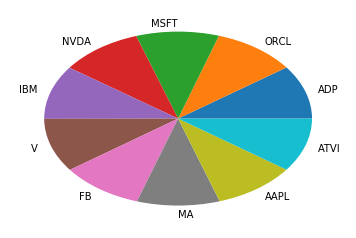

  Week  2


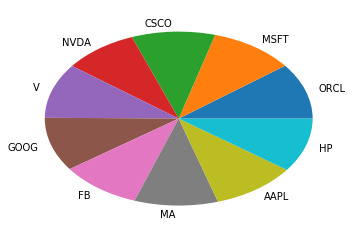

  Week  3


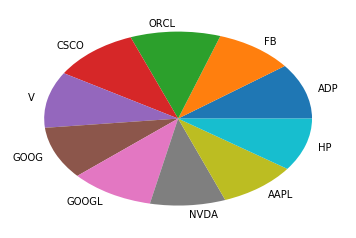

  Week  4


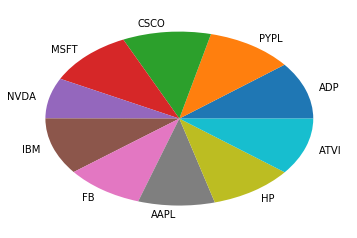

  Week  5


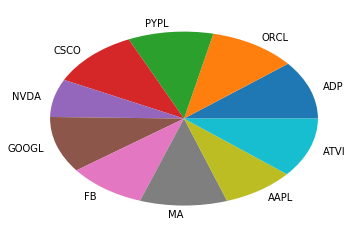

  Week  6


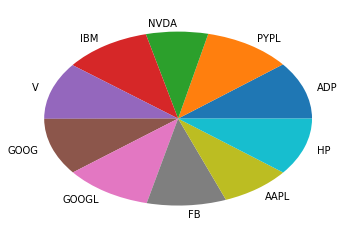

In [30]:


set_w = set()
for week in range(1, max_weeks+1):
   
    current_list = list(current_dict[week].keys())
    c = numpy.array(current_list[0:10])
    set_c = set(c)
    if (week == 1):
        set_w = set_c
   
    print ("================================================ Week",week," ================================================")
    print ("")
    print ("Current Portfolio is       ",set_w)
    print ("This week's top 10 list is ",set_c)
    print ("New ones to buy are        ",new_additions(set_w,set_c))
    new = len(new_additions(set_w,set_c))

    set_sell = sell_list(set_w,set_c)
    print ("Sell List                  ",set_sell)
    
    set_w = new_list(set_w,set_c)
    print ("New List is                ",set_w)

    print ("")
    print("Portfolio investment distribution")
    print("================================")
    if (week == 1):
        wallet_bal[week] = create_porfolio(set_w,week,inv_amt)
    else:
        wallet_bal[week] = modify_porfolio(set_sell, new, set_w,week)

    pretty_print(wallet_list[week])
    #print("wallet start")
    #print(wallet_list)
    #print("wallet end")

    print ("Amount remaining in wallet ", wallet_bal[week])  

    #current_list = list(current_dict[week+1].keys())
    #c = numpy.array(current_list[0:10])
    #set_c = set(c)
    print ("")
    print ("")
    
db_portfolio_wallet_update()

    
print("Porfolio changes for the past ", max_weeks, " weeks")

for week in range(1, max_weeks+1):
    print ("  Week ", week)
    print ("=============")
    df = pd.DataFrame(wallet_list[week])
    plt.pie(df[3], labels=df[0])
    plt.show()

In [31]:
import datetime
#datetime.datetime.today().strftime('%Y-%m-%d')
type(datetime.datetime.now())

datetime.datetime